In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score

In [3]:
x_train_encoding_df = pd.read_csv('C:/TIL/Team project/Semi pro1/x_train_encoding_df.csv')
x_test_encoding_df = pd.read_csv('C:/TIL/Team project/Semi pro1/x_test_encoding_df.csv')

x_train_encoding_new = pd.read_csv('C:/TIL/Team project/Semi pro1/x_train_encoding_new.csv')
x_test_encoding_new = pd.read_csv('C:/TIL/Team project/Semi pro1/x_test_encoding_new.csv')

y_train = pd.read_csv('C:/TIL/Team project/Semi pro1/y_train.csv')
y_test = pd.read_csv('C:/TIL/Team project/Semi pro1/y_test.csv')

In [4]:
x_train = np.array(x_train_encoding_df)
x_test = np.array(x_test_encoding_df)

x_train_new = np.array(x_train_encoding_new)
x_test_new = np.array(x_test_encoding_new)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [19]:
## Gradient boosting ckassifier

params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(x_train, y_train)

acc = accuracy_score(y_test, clf.predict(x_test))
print("The accuracy score on test set: {:.4f}".format(acc))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy score on test set: 0.7978


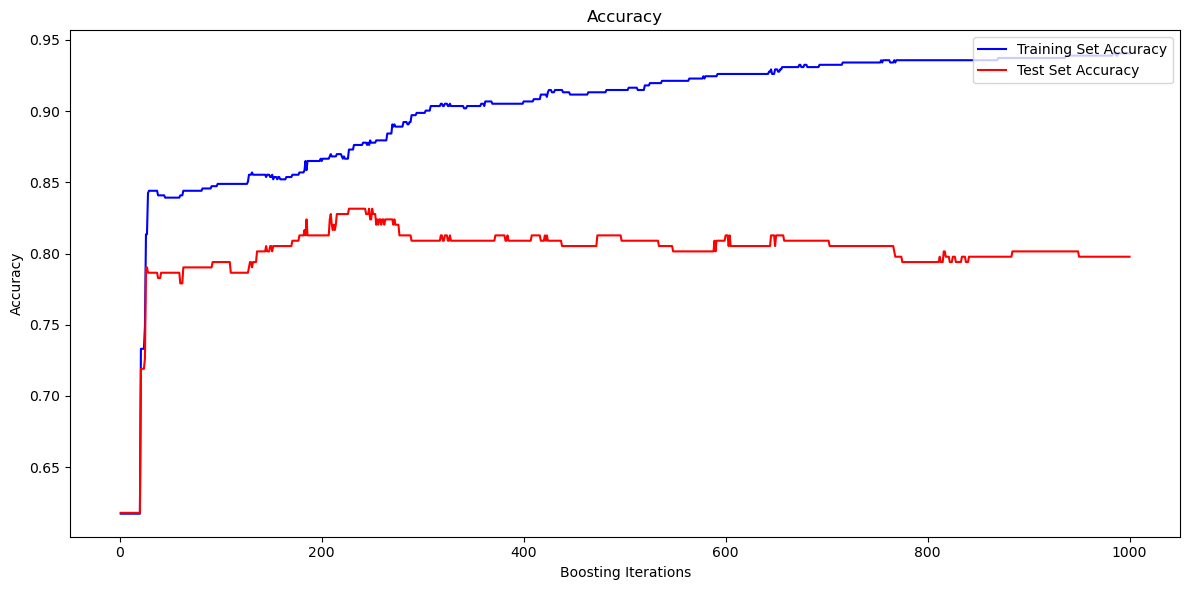

In [20]:
train_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(x_train)):
    train_score[i] = accuracy_score(y_train, y_pred)

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(x_test)):
    test_score[i] = accuracy_score(y_test, y_pred)
    
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Accuracy') # Binomial deviance loss function for binary classification
plt.plot(np.arange(params['n_estimators']) + 1, train_score, 'b-', label='Training Set Accuracy')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Accuracy')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Accuracy')
fig.tight_layout()
plt.show()

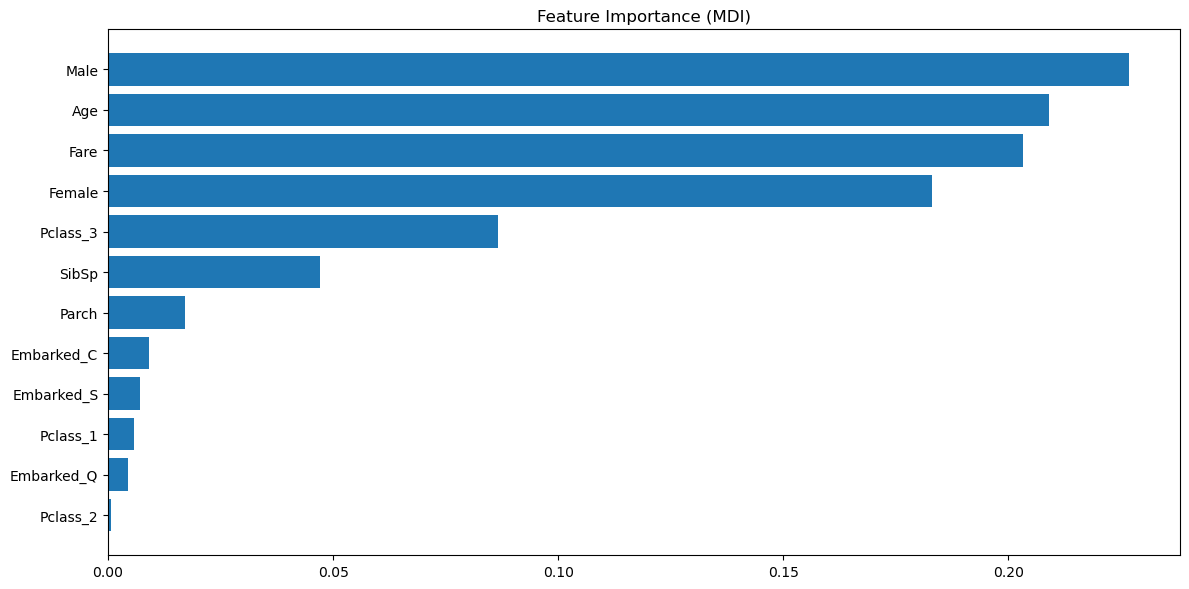

In [21]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(12, 6))

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_train_encoding_df.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

fig.tight_layout()
plt.show()

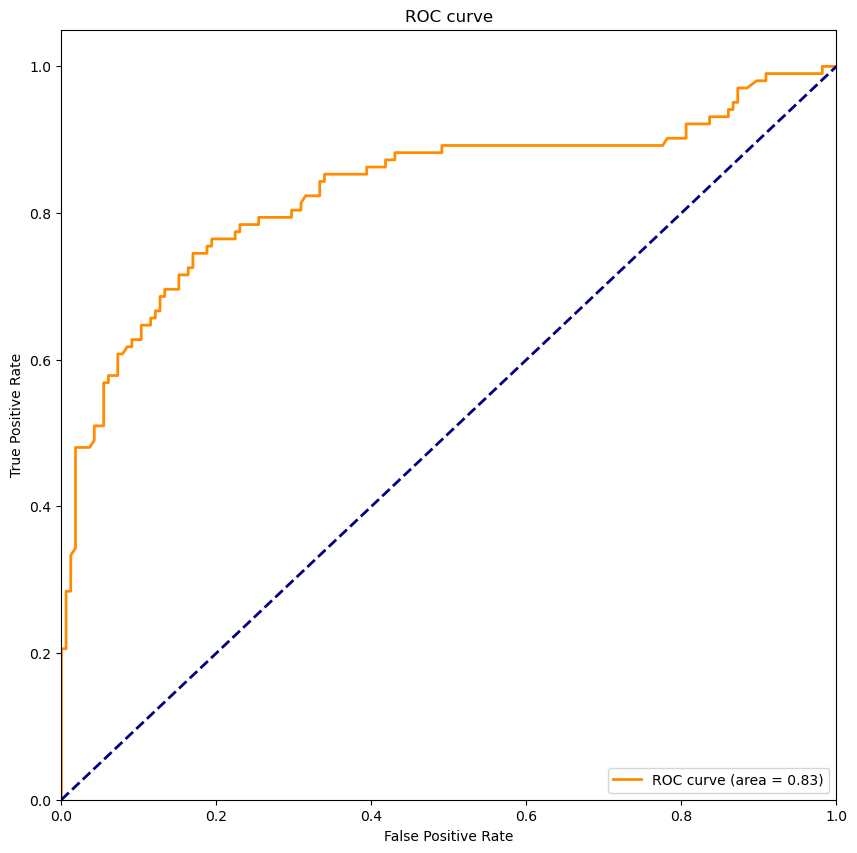

In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=clf.predict_proba(x_test)[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

In [24]:
from sklearn.metrics import classification_report

predictions = clf.predict(x_test)
print(classification_report(y_test, predictions)) # Precision, Recall, F1-score 등을 확인할 수 있습니다.

print("Accuracy on Training set: {:.3f}".format(clf.score(x_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(clf.score(x_test, y_test)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       165
           1       0.76      0.69      0.72       102

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267

Accuracy on Training set: 0.941
Accuracy on Test set: 0.798


### Family 컬럼 포함

In [12]:
## Gradient boosting classifier

params = {'n_estimators': 1000, # n_esitmators가 1000 이상이 되면 정확도 감소함 
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01}

clf_2 = ensemble.GradientBoostingClassifier(**params)
clf_2.fit(x_train_new, y_train)

acc = accuracy_score(y_test, clf_2.predict(x_test_new))
print("The accuracy score on test set: {:.4f}".format(acc))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy score on test set: 0.8127


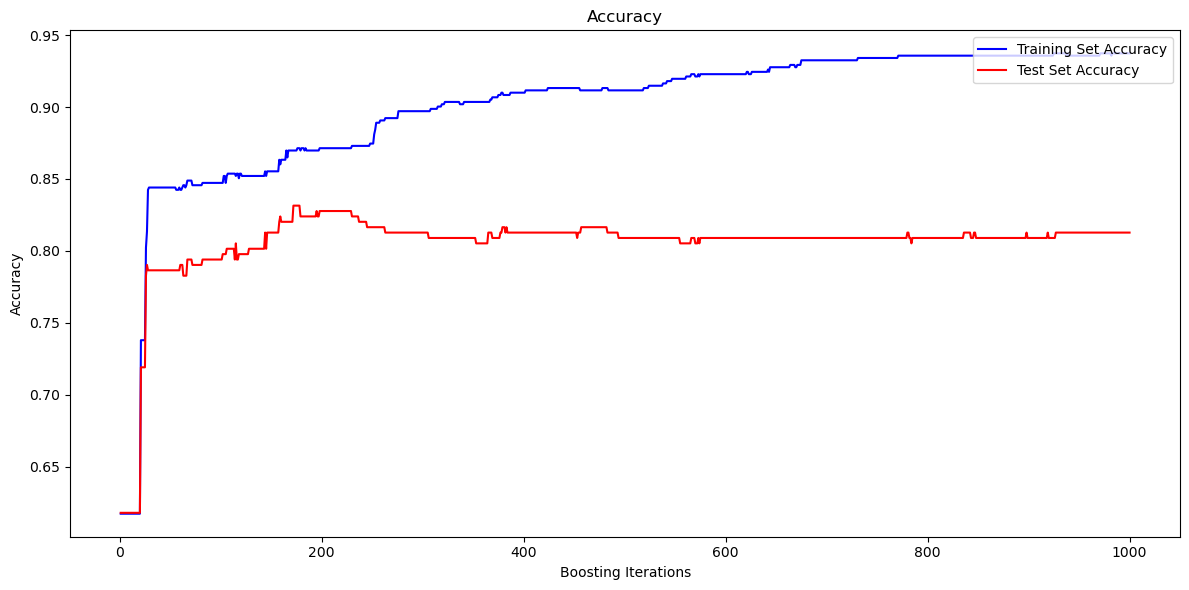

In [13]:
train_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf_2.staged_predict(x_train_new)):
    train_score[i] = accuracy_score(y_train, y_pred)

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf_2.staged_predict(x_test_new)):
    test_score[i] = accuracy_score(y_test, y_pred)
    
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Accuracy') # Binomial deviance loss function for binary classification
plt.plot(np.arange(params['n_estimators']) + 1, train_score, 'b-', label='Training Set Accuracy')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Accuracy')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Accuracy')
fig.tight_layout()
plt.show()

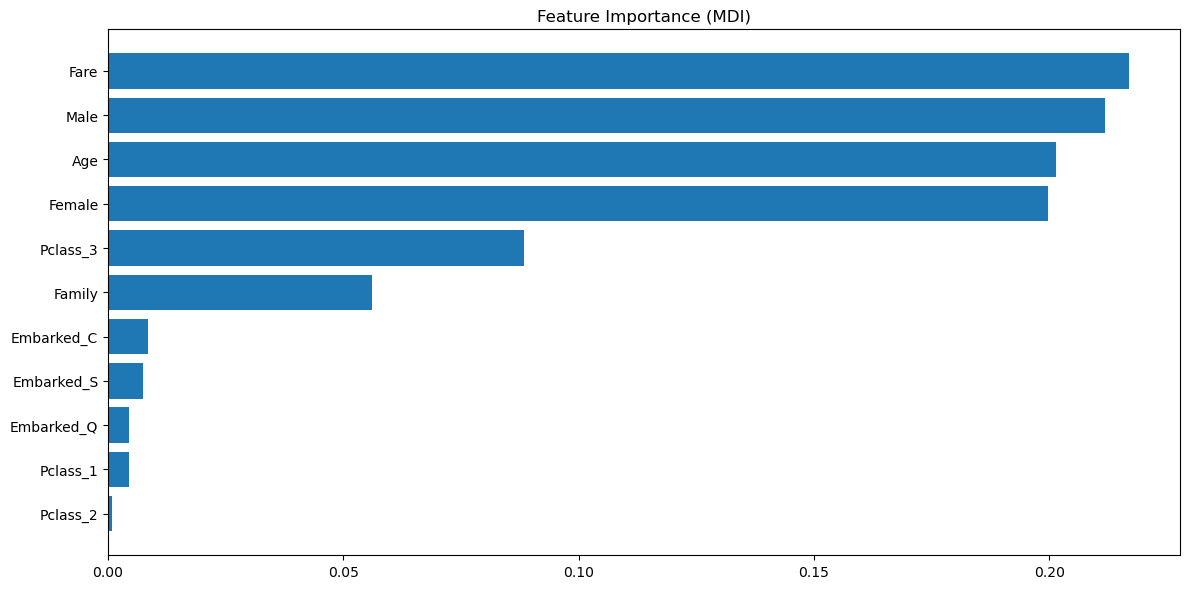

In [14]:
feature_importance = clf_2.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(12, 6))

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_train_encoding_new.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

fig.tight_layout()
plt.show()

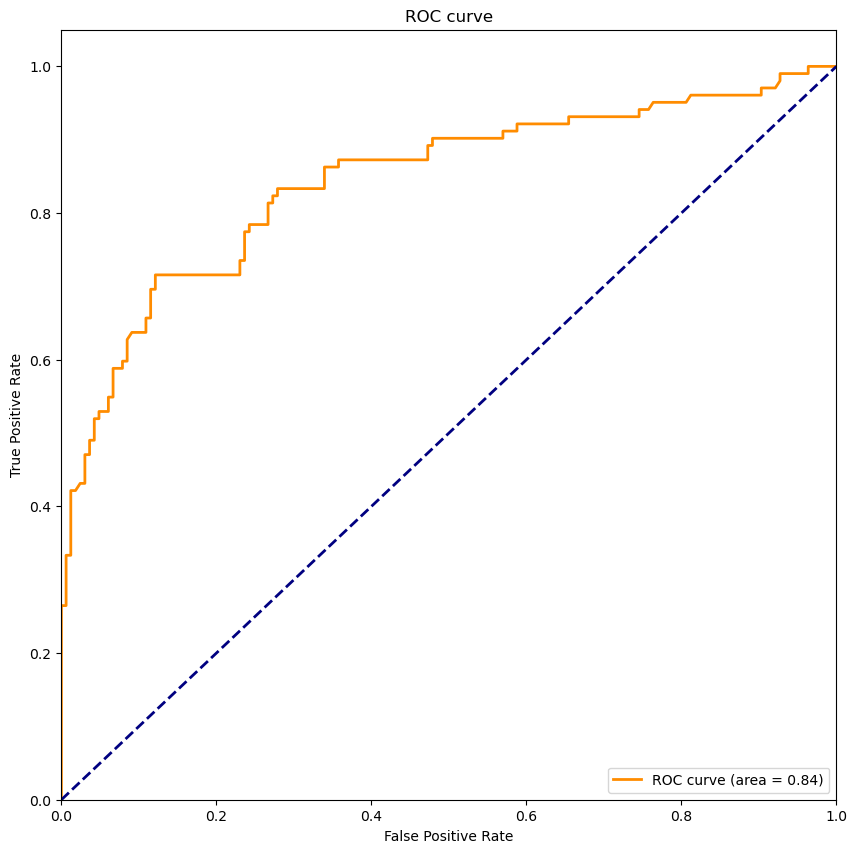

In [15]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=clf_2.predict_proba(x_test_new)[:,1]) # real y & predicted y 
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

In [16]:
from sklearn.metrics import classification_report

predictions = clf_2.predict(x_test_new)
print(classification_report(y_test, predictions)) # Precision, Recall, F1-score 등을 확인할 수 있습니다.

print("Accuracy on Training set: {:.3f}".format(clf_2.score(x_train_new, y_train)))
print("Accuracy on Test set: {:.3f}".format(clf_2.score(x_test_new, y_test)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       165
           1       0.78      0.72      0.74       102

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267

Accuracy on Training set: 0.937
Accuracy on Test set: 0.813
